In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("\MBAN- Schulich\MBAN- Sem 1\Data Science 1- MBAN 6110\Group Assignment\Airbnb_Open_Data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\nazil\AppData\Local\Temp\ipykernel_17676\2165002629.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("\MBAN- Schulich\MBAN- Sem 1\Data Science 1- MBAN 6110\Group Assignment\Airbnb_Open_Data.csv")
C:\Users\nazil\AppData\Local\Temp\ipykernel_17676\2165002629.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("\MBAN- Schulich\MBAN- Sem 1\Data Science 1- MBAN 6110\Group Assignment\Airbnb_Open_Data.csv")


In [3]:
print("df shape:", df.shape)
print(df.head())

df shape: (102599, 26)
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.647

In [4]:
# Renaming the columns and replace white spaces in column names with "_"
df.columns = df.columns.str.replace(' ', '_')

In [5]:
# Transforming data type 'service fee' and "price" from object to float 
df["service_fee"] = df["service_fee"].str.replace("$", "").str.replace(",", "").astype(float)
df["price"] = df["price"].str.replace("$", "").str.replace(",", "").astype(float)

In [6]:
# Exloring the data type of each column.  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
# Removing duplicate rows based on all columns

df.drop_duplicates(inplace=True)
df.shape

(102058, 26)

In [8]:
# Checking missing values
missing_values = df.isnull().sum()
missing_values

id                                     0
NAME                                 250
host_id                                0
host_identity_verified               289
host_name                            404
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
Construction_year                    214
price                                247
service_fee                          273
minimum_nights                       400
number_of_reviews                    183
last_review                        15832
reviews_per_month                  15818
review_rate_number                   319
calculated_host_listings_count       319
availability_365                     448
house_rules     

In [9]:
# Handling missing value with median for numerical columns
num_columns = ['Construction_year', 'minimum_nights', 'number_of_reviews',
                     'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count',
                     'availability_365']
for i in num_columns:
    df[i].fillna(df[i].median(), inplace=True)

C:\Users\nazil\AppData\Local\Temp\ipykernel_17676\3392258472.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)
C:\Users\nazil\AppData\Local\Temp\ipykernel_17676\3392258472.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [10]:
# Filling missing values with the mode for categorical columns
categorical_columns = ['neighbourhood_group', 'neighbourhood','instant_bookable', 'cancellation_policy',
                       'room_type', 'house_rules']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\nazil\AppData\Local\Temp\ipykernel_17676\2675816018.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\nazil\AppData\Local\Temp\ipykernel_17676\2675816018.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0], inpl

In [11]:
# Droping unnecessary columns
df.drop(['host_id','NAME', 'host_identity_verified', 'host_name', 'country', 'country_code', 'license','last_review'], axis=1, inplace=True)

In [12]:
df.shape

(102058, 18)

In [13]:
# Interpolating missing values for 'price' and 'service_fee'
df[['price', 'service_fee']] = df[['price', 'service_fee']].interpolate()

In [14]:
# Removing missing data in 'lat' and 'long'
df.dropna(subset=['lat', 'long'], inplace=True)

In [15]:
# Checking the dataset after handling missing values
df.isnull().sum(), df.shape

(id                                0
 neighbourhood_group               0
 neighbourhood                     0
 lat                               0
 long                              0
 instant_bookable                  0
 cancellation_policy               0
 room_type                         0
 Construction_year                 0
 price                             0
 service_fee                       0
 minimum_nights                    0
 number_of_reviews                 0
 reviews_per_month                 0
 review_rate_number                0
 calculated_host_listings_count    0
 availability_365                  0
 house_rules                       0
 dtype: int64,
 (102050, 18))

In [16]:
df.shape

(102050, 18)

In [17]:
# Correcting Misspelling. Replacing "brookln" with "Brooklyn" in the neighbourhood_group Column
df["neighbourhood_group"] = df["neighbourhood_group"].replace({"brookln": "Brooklyn"})

In [18]:
# Matching neighbourhood_group with neighbourhood
df[["neighbourhood_group","neighbourhood"]].head()

,neighbourhood_group,neighbourhood
0,Brooklyn,Kensington
1,Manhattan,Midtown
2,Manhattan,Harlem
3,Brooklyn,Clinton Hill
4,Manhattan,East Harlem


In [19]:
#Exploring uniques values in neighbourhood_group and neighbourhood
print ("unique_values",df[["neighbourhood_group","neighbourhood"]].nunique())

unique_values neighbourhood_group      6
neighbourhood          224
dtype: int64


In [29]:
# Analyzing neighbourhood_group Airbnb Locations
top_neighbourhood_group = df["neighbourhood_group"].value_counts()

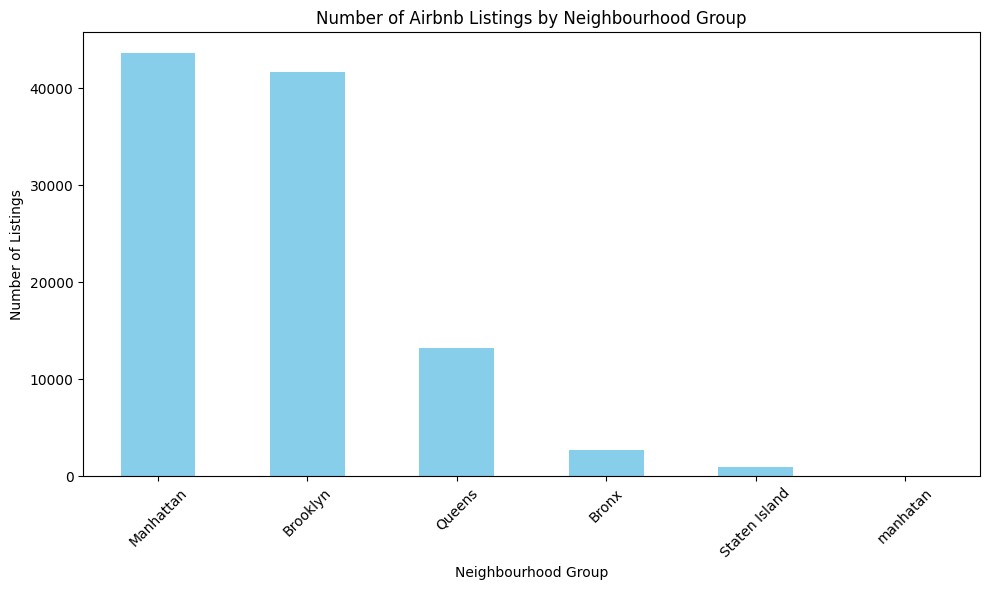

In [30]:
# Plotting the counts
plt.figure(figsize=(10, 6))
top_neighbourhood_group.plot(kind='bar', color='skyblue')
plt.title('Number of Airbnb Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Finding the 10 neighborhoods with the most Airbnb locations.
top_neighborhoods = df["neighbourhood"].value_counts().head(10)

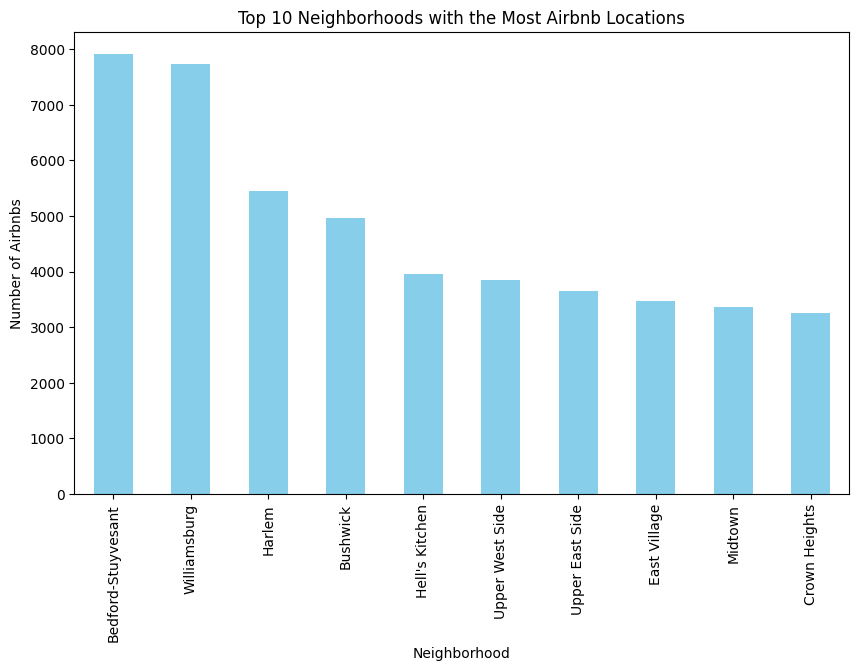

In [32]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
top_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods with the Most Airbnb Locations')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Airbnbs')
plt.show()

In [24]:
#Listing the count of various room types avaliable with Airbnb
room_type_counts = df ['room_type'].value_counts()
print("Count of Various Room Types Available:")
print(room_type_counts)

Count of Various Room Types Available:
room_type
Entire home/apt    53427
Private room       46300
Shared room         2208
Hotel room           115
Name: count, dtype: int64


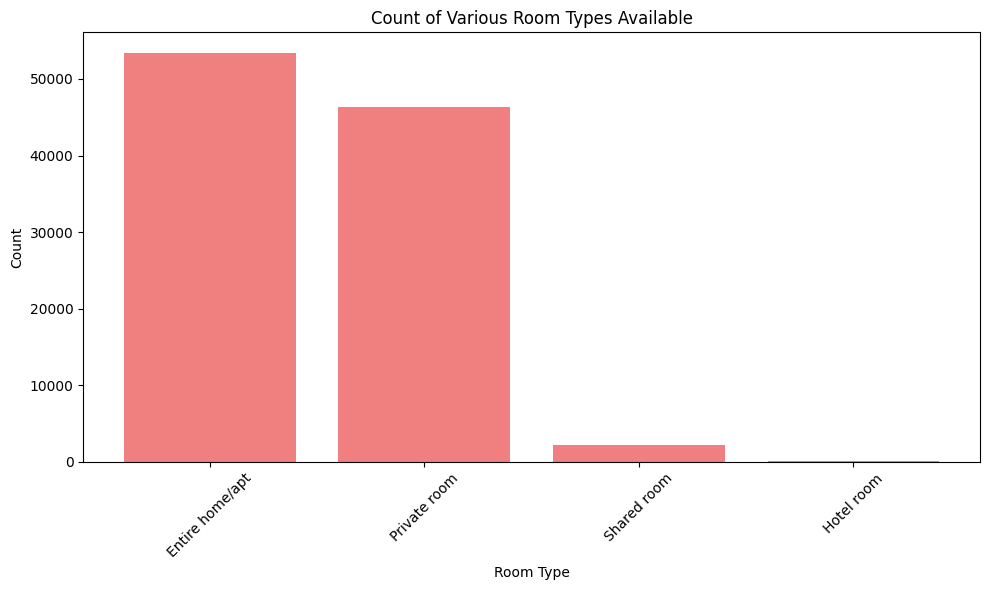

In [35]:
# Plotting Room Type Counts
plt.figure(figsize=(10, 6))
plt.bar(room_type_counts.index, room_type_counts.values, color='lightcoral')
plt.title('Count of Various Room Types Available')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

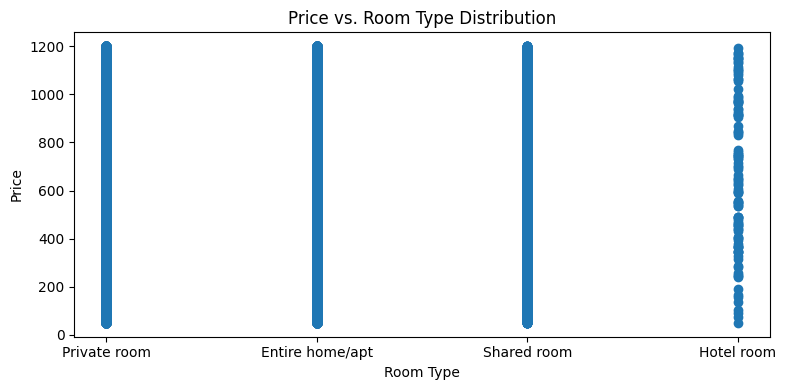

In [51]:
# Visualizing price and room type distribution
plt.figure(figsize=(8, 4))
plt.scatter(df['room_type'], df['price'])
plt.title("Price vs. Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Price")

plt.tight_layout()
plt.show()

In [25]:
## Listing the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
avg_price_neighborhood = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print("Average price per neighborhood group:")
print(avg_price_neighborhood)

Average price per neighborhood group:
neighbourhood_group
Queens           629.960255
Bronx            627.706689
Brooklyn         626.369853
Staten Island    624.397493
Manhattan        622.470187
manhatan         460.000000
Name: price, dtype: float64


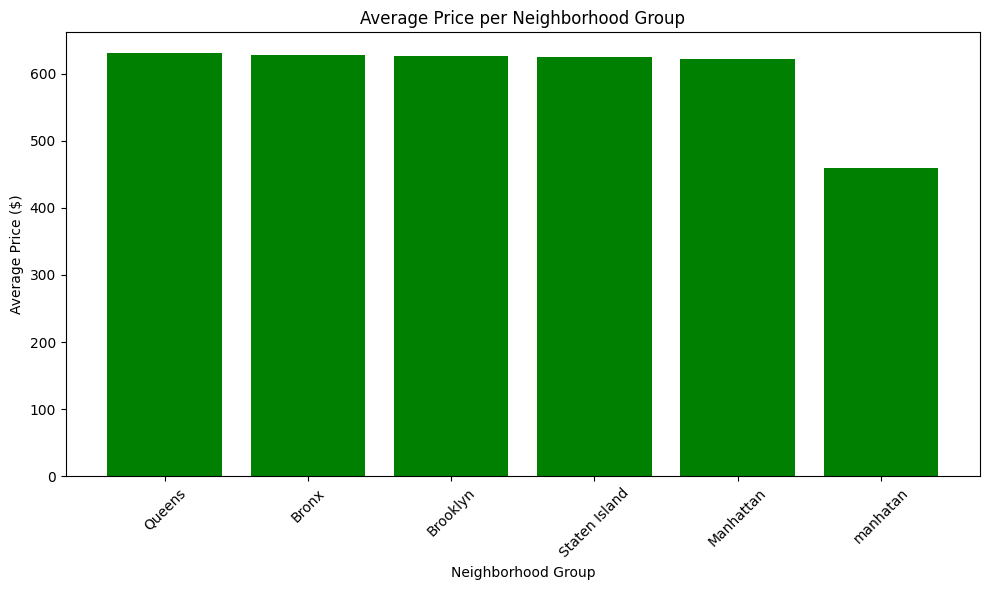

In [37]:
# Plotting Average Price per Neighborhood Group
plt.figure(figsize=(10, 6))
plt.bar(avg_price_neighborhood.index, avg_price_neighborhood.values, color='green')
plt.title('Average Price per Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
df[["price", "review_rate_number"]].describe()

,price,review_rate_number
count,102050.000000,102050.000000
mean,625.184032,3.277923
std,331.558520,1.283152
min,50.000000,1.000000
25%,340.000000,2.000000
50%,624.000000,3.000000
75%,913.000000,4.000000
max,1200.000000,5.000000


In [52]:
import seaborn as sns

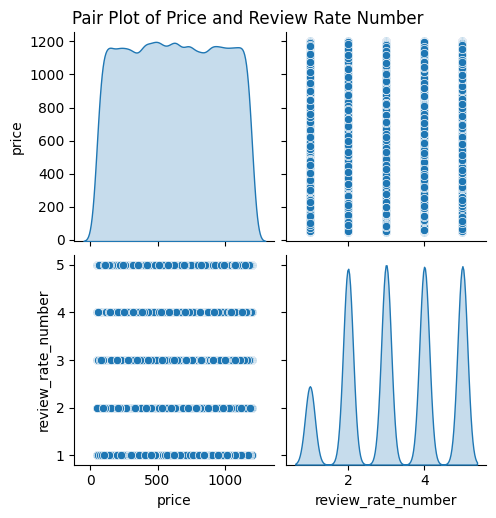

In [53]:
# Pair Plot to understand price and review score
sns.pairplot(df[['price', 'review_rate_number']], diag_kind='kde')
plt.suptitle('Pair Plot of Price and Review Rate Number', y=1.02)
plt.show()

In [48]:
from scipy.stats import probplot

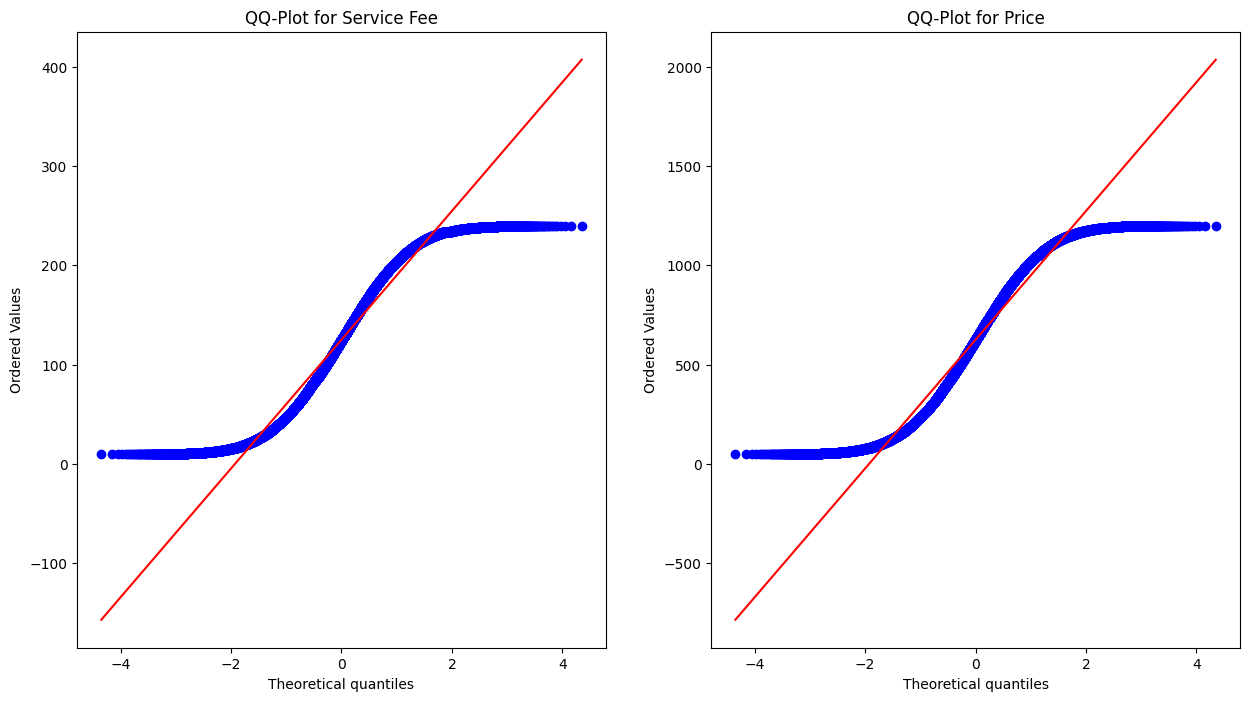

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# QQ-plot for 'service fee' column
probplot(df['service_fee'], plot=ax[0], fit=True)
ax[0].set_title('QQ-Plot for Service Fee')

# QQ-plot for 'price' column
probplot(df['price'], plot=ax[1], fit=True)
ax[1].set_title('QQ-Plot for Price')

plt.show()

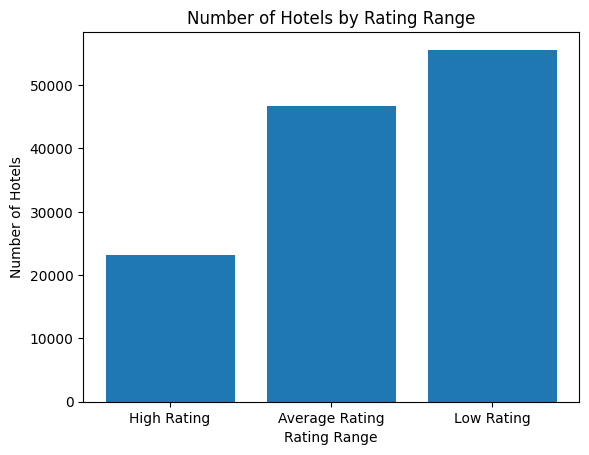

In [50]:
# Finding out the rating distribution
high_rating_range = (4.5, 5.0)
average_rating_range = (3.0, 4.5)
low_rating_range = (0.0, 3.0)

high_rated_hotels = df[df['review_rate_number'].between(*high_rating_range)]
average_rated_hotels = df[df['review_rate_number'].between(*average_rating_range)]
low_rated_hotels = df[df['review_rate_number'].between(*low_rating_range)]

hotel_counts = {
    "High Rating": len(high_rated_hotels),
    "Average Rating": len(average_rated_hotels),
    "Low Rating": len(low_rated_hotels),
}

plt.bar(hotel_counts.keys(), hotel_counts.values())

plt.title("Number of Hotels by Rating Range")
plt.xlabel("Rating Range")
plt.ylabel("Number of Hotels")

plt.show()

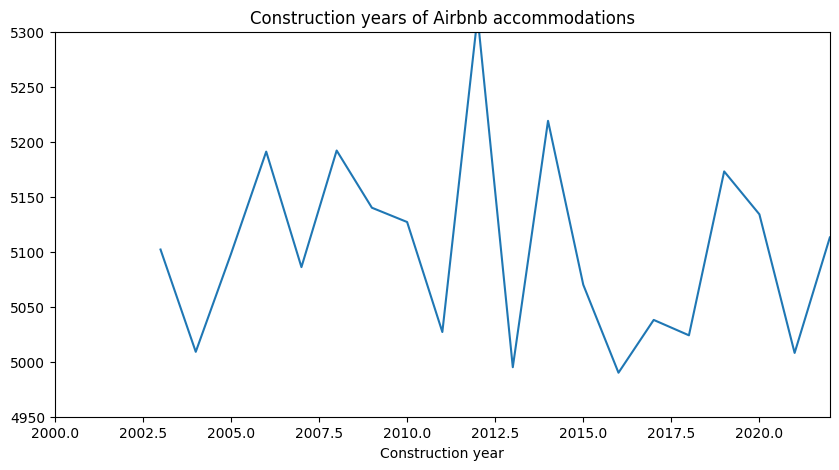

In [54]:
# Understanding the age of the buildings
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby('Construction_year')['id'].count().plot(kind='line')
ax.set(title='Construction years of Airbnb accommodations', xlabel='Construction year')
ax.set_xlim(2000, 2022)
ax.set_ylim(4950, 5300)
plt.show()